Using pyquafu simulate to calucate H2 energy with VQE method.

In [1]:
import sys
sys.path.append('../src')
from vqe import *

libi40iw-i40iw_vmapped_qp: failed to pin memory for SQ
libi40iw-i40iw_ucreate_qp: failed to map QP
libi40iw-i40iw_vmapped_qp: failed to pin memory for SQ
libi40iw-i40iw_ucreate_qp: failed to map QP


In [2]:
# 所需计算的分子信息 (以openfermion的格式输入)
basis = "sto-3g"
multiplicity = 1
charge = 0
token_ip = None # 如果使用Quafu的真实量子计算机，需要输入特定的Token
geometry = [("H", [0.0, 0.0, 0]), ("H", [0.0, 0.0, 0.74])]
info = [geometry, basis, multiplicity, charge]
vqe = VQE(info, token_ip=token_ip, simulator=True,reduce_two_qubit=False)# 初始化VQE, simulate=True:使用quafu模拟计算

/home/lenovo2/anaconda3/envs/py39/lib/python3.9/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


Lengt of Hamiltonian:  15
Minimum number of QWC groupings found: 5
The optimizer is Adam.


In [4]:
# .run()运行VQE程序，运行中会打印出每次一迭代得到的能量值，和FCI的误差，以及梯度的最大值(默认使用parameters-shift方法计算梯度)
energys, amps, grads, grads_max = vqe.run() # 返回值为能量，优化好的参数，梯度和梯度最大值

0 iteration, energy: -0.2666023751, error with FCI: 0.8706814594, ||g_max||: 0.0000000000
1 iteration, energy: -0.3859121617, error with FCI: 0.7513716728, ||g_max||: 0.4076653808
2 iteration, energy: -0.5091933015, error with FCI: 0.6280905330, ||g_max||: 0.3585568636
3 iteration, energy: -0.6253395795, error with FCI: 0.5119442550, ||g_max||: 0.2985717732
4 iteration, energy: -0.7210548751, error with FCI: 0.4162289594, ||g_max||: 0.2084016418
5 iteration, energy: -0.7901023101, error with FCI: 0.3471815244, ||g_max||: 0.2467345591
6 iteration, energy: -0.8397134049, error with FCI: 0.2975704296, ||g_max||: 0.2708375684
7 iteration, energy: -0.8828004681, error with FCI: 0.2544833664, ||g_max||: 0.2764512323
8 iteration, energy: -0.9274307577, error with FCI: 0.2098530768, ||g_max||: 0.2628580942
9 iteration, energy: -0.9734089836, error with FCI: 0.1638748508, ||g_max||: 0.2461362535
10 iteration, energy: -1.0165775143, error with FCI: 0.1207063202, ||g_max||: 0.2535996493
11 iterat

In [7]:
#最终迭代140收敛，收敛能量为:
print('Converged energy: ',energys[-1])

Converged energy:  -1.1372732581846754


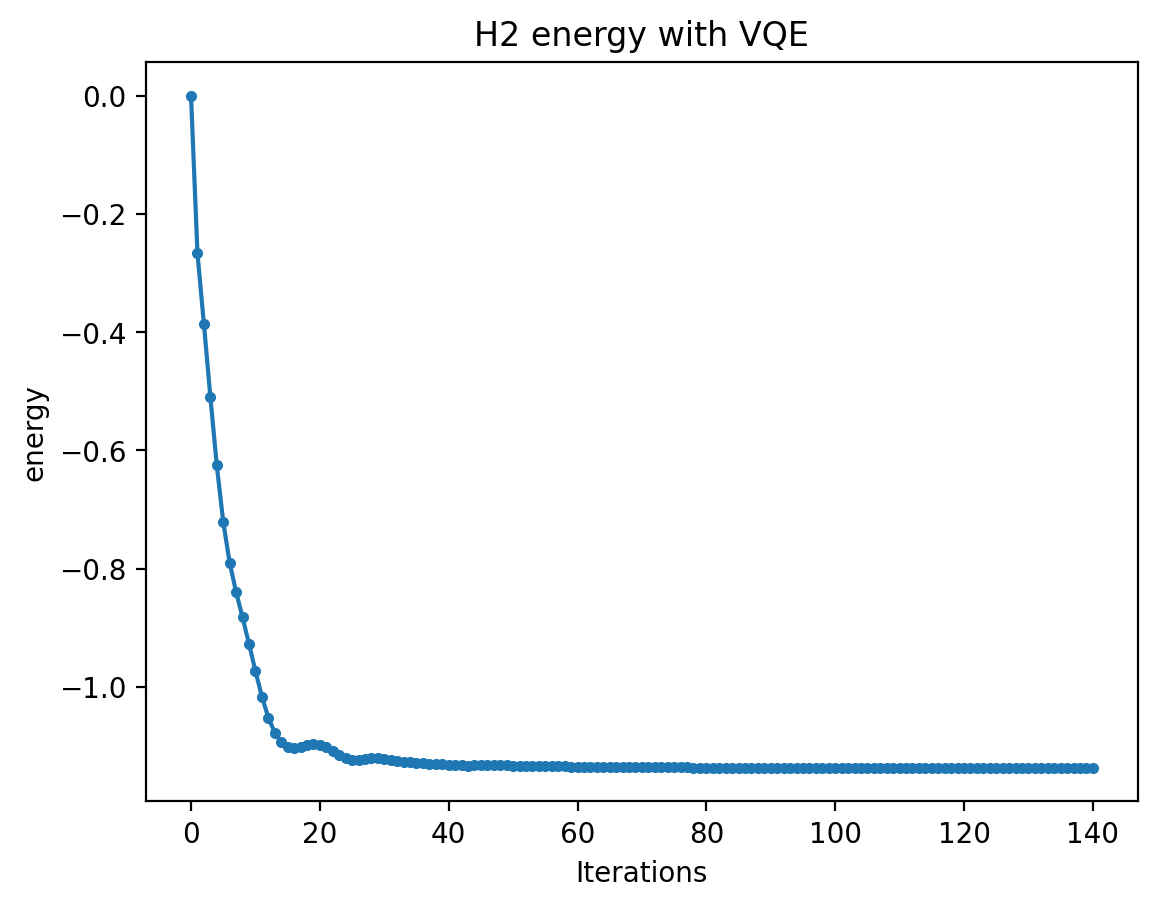

In [6]:
# 我们可以画出优化过程中的能量
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.plot(energys, marker='.')
plt.xlabel('Iterations')
plt.ylabel('energy')
plt.title('H2 energy with VQE')
plt.show()

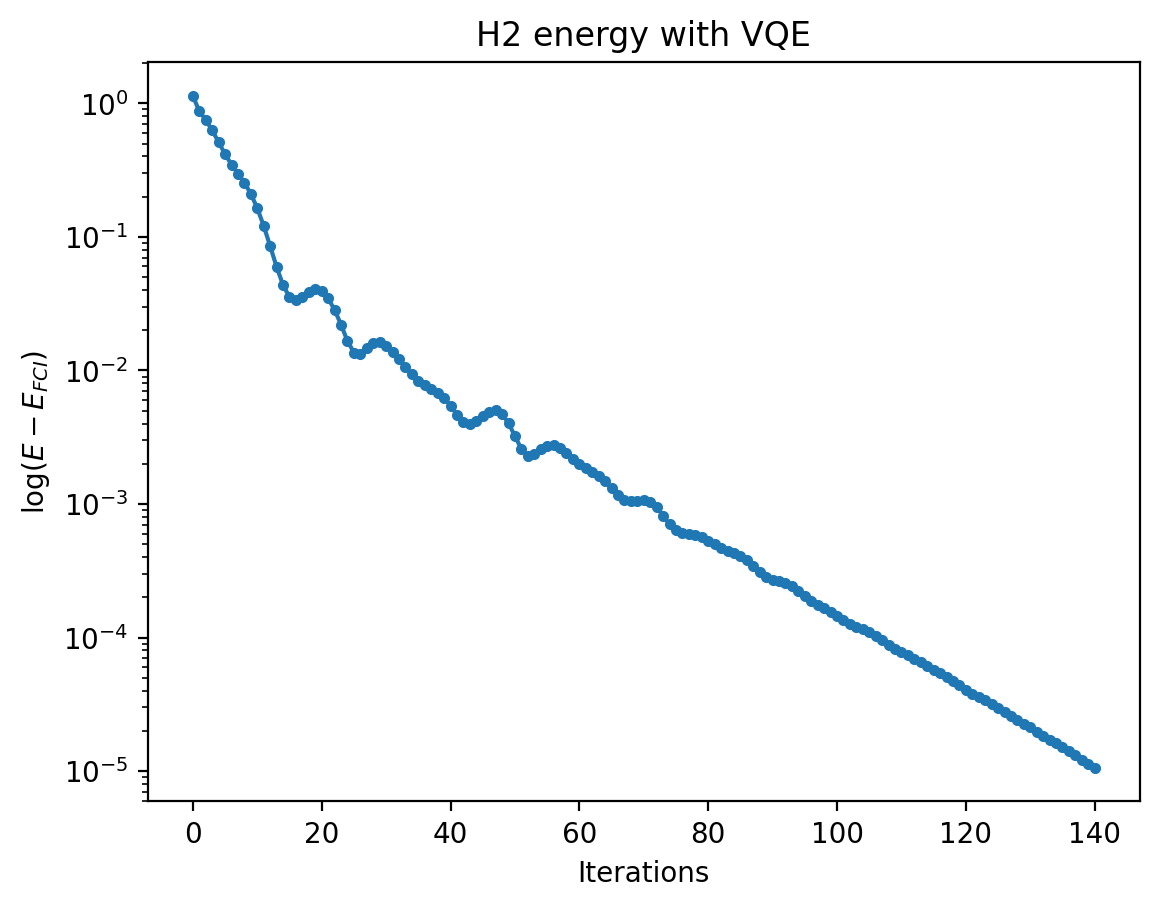

In [18]:
# 也可以以与FCI的能量差为y轴，画出能量优化过程
plt.plot(energys-vqe.mol.fci_energy, marker='.')
plt.xlabel('Iterations')
plt.ylabel(r'log($E-E_{FCI}$)')
plt.title('H2 energy with VQE')
plt.yscale('log')
plt.show()

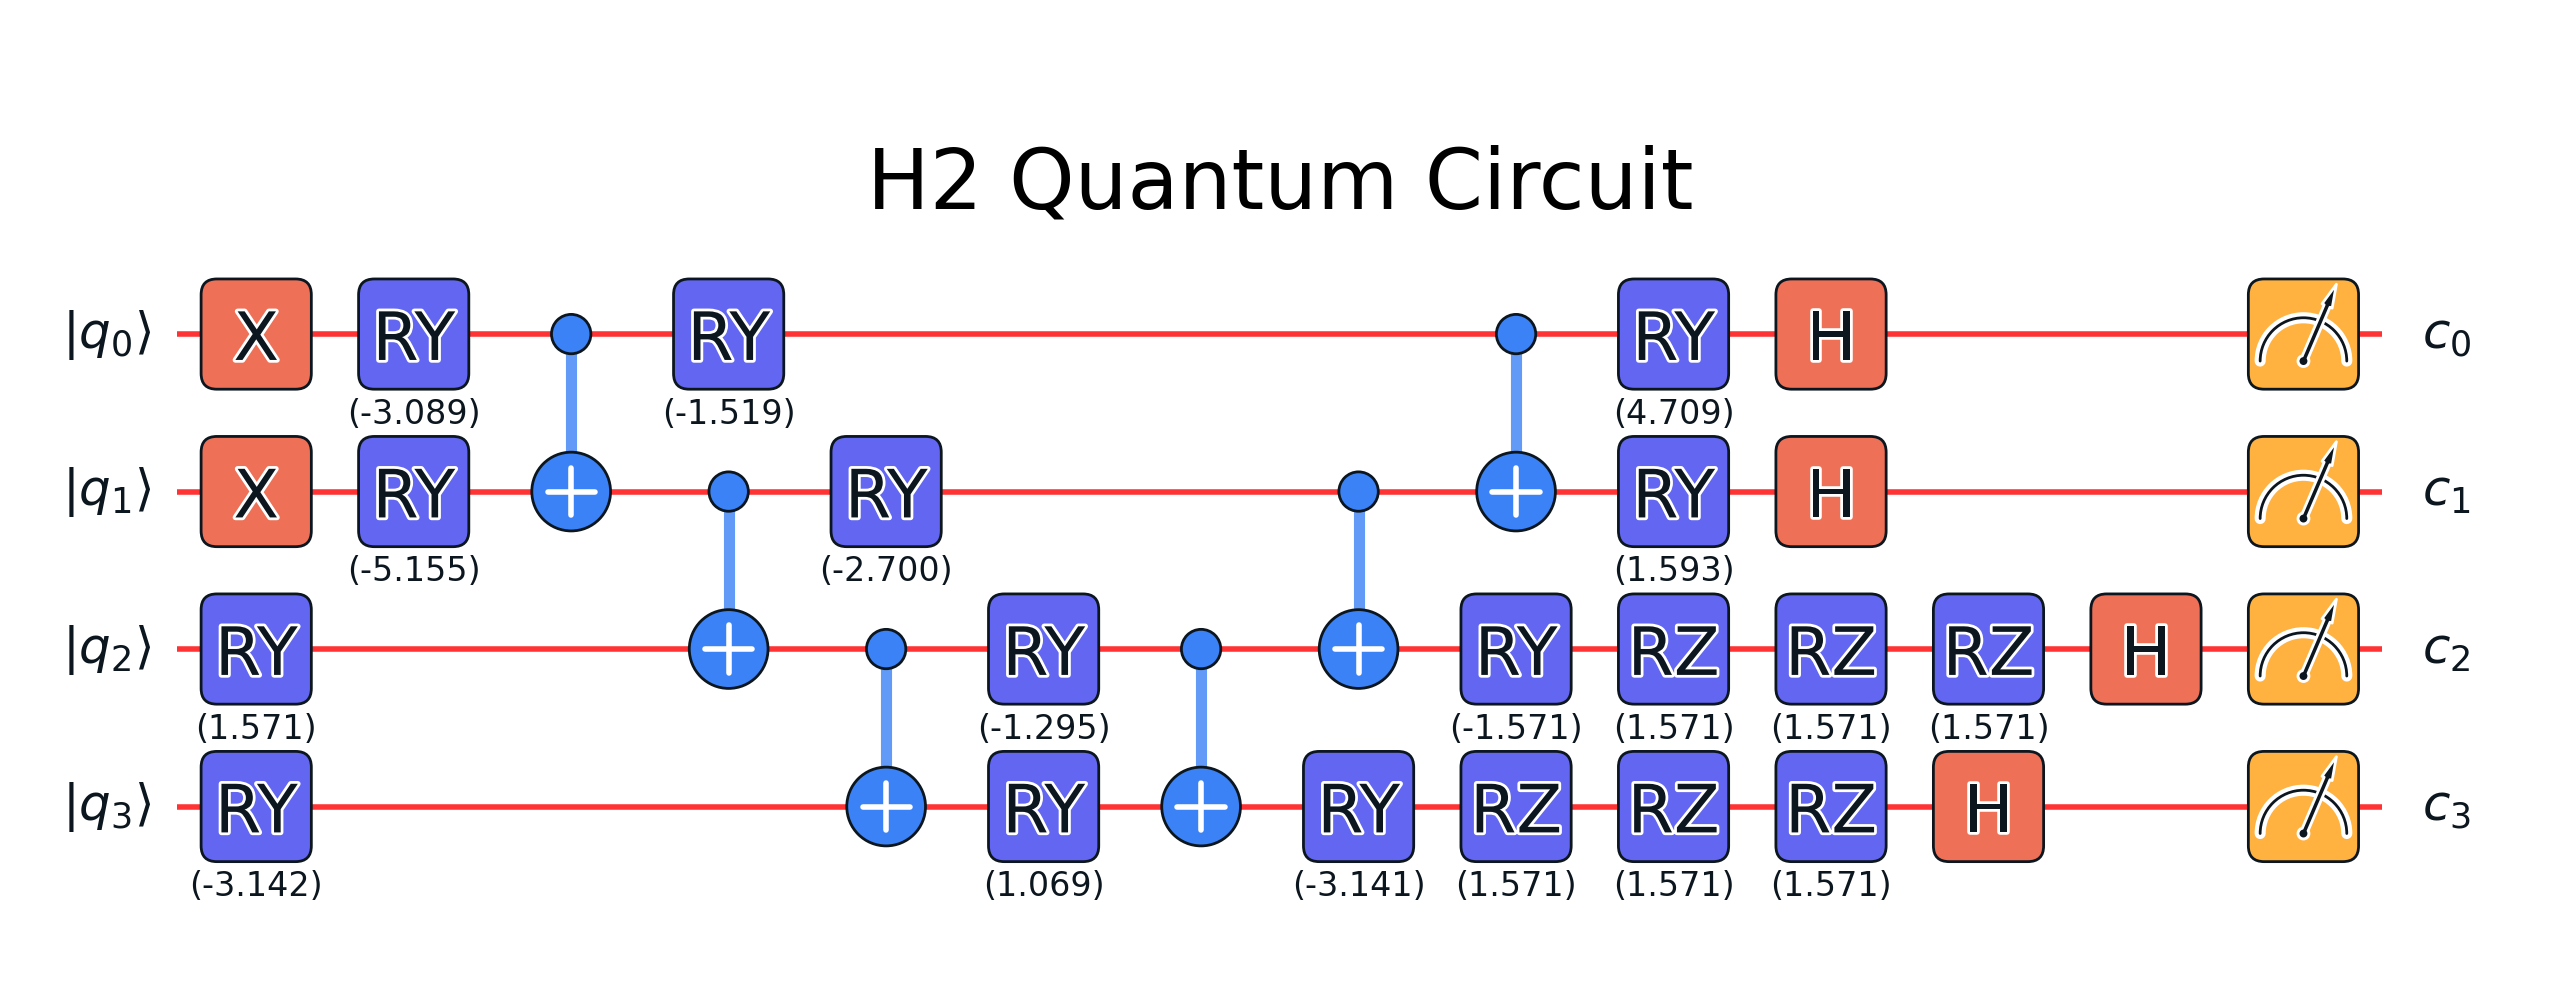

In [17]:
# 我们可以打印出VQE的各种信息
# 我们使用 ry_cascade 作为我们的VQE ansatz
vqe.qc.plot_circuit(title='H2 Quantum Circuit') 

In [21]:
# 分子Hamiltonian由openfermion得到，在VQE计算中，我们将其存储为一个list，其结构为一个Pauli串对应一个系数
print(vqe.qham)

[-0.09706626816763131, [], 0.17141282644776906, ['Z0'], 0.1714128264477691, ['Z1'], -0.22343153690813441, ['Z2'], -0.2234315369081344, ['Z3'], 0.16868898170361205, ['Z0', 'Z1'], 0.12062523483390411, ['Z0', 'Z2'], 0.1659278503377034, ['Z0', 'Z3'], 0.1659278503377034, ['Z1', 'Z2'], 0.12062523483390411, ['Z1', 'Z3'], 0.17441287612261586, ['Z2', 'Z3'], 0.04530261550379927, ['Y0', 'X1', 'X2', 'Y3'], -0.04530261550379927, ['Y0', 'Y1', 'X2', 'X3'], -0.04530261550379927, ['X0', 'X1', 'Y2', 'Y3'], 0.04530261550379927, ['X0', 'Y1', 'Y2', 'X3']]


In [23]:
# Hamiltonian一共包含15项，这意味着要分别进行14次测量(空的Pauli串不需要进行测量)，可以使用QWC(qubit-wise commuting)算法减少测量项，最终需要的测量Pauli串为：
print(vqe.qham_measure) # 一共5项

[['Z0', 'Z1', 'Z2', 'Z3'], ['Y0', 'X1', 'X2', 'Y3'], ['X0', 'Y1', 'Y2', 'X3'], ['Y0', 'Y1', 'X2', 'X3'], ['X0', 'X1', 'Y2', 'Y3']]


In [24]:
# 使用的qubits等
print(vqe.nqubits)

4
